<a href="https://colab.research.google.com/github/abhik718/DSSS/blob/DSSS/DSSS8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
import tensorflow_datasets as tfds
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

In [2]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [ ]:
print(x_train[0])

In [ ]:
print(x_train.shape)

In [ ]:
print(y_train.shape)

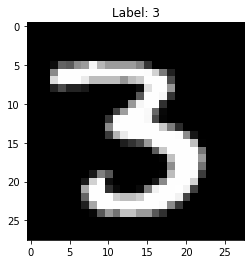

In [6]:
#Plot one train_data
plt.imshow(x_train[12], cmap='gray')
plt.title('Label: %i' % y_train[12])
plt.show()

In [7]:
#Rescale train and test data
x_train, x_test = x_train / 255.0, x_test / 255.0

In [8]:
# Add a channels dimension
x_train = x_train[..., tf.newaxis].astype("float32")
x_test = x_test[..., tf.newaxis].astype("float32")

In [9]:
print(x_train.shape)
print(x_test.shape)

(60000, 28, 28, 1)
(10000, 28, 28, 1)


In [10]:
train_ds = tf.data.Dataset.from_tensor_slices(
    (x_train, y_train)).shuffle(10000).batch(32)
test_ds = tf.data.Dataset.from_tensor_slices((x_test, y_test)).batch(32)

In [11]:
print(train_ds)
print(test_ds)

<BatchDataset element_spec=(TensorSpec(shape=(None, 28, 28, 1), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.uint8, name=None))>
<BatchDataset element_spec=(TensorSpec(shape=(None, 28, 28, 1), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.uint8, name=None))>


In [12]:
model = tf.keras.Sequential()

from keras.models import Sequential
from keras.layers import Conv2D, Input, Activation, Dense, Flatten, Dropout, MaxPooling2D

model.add(Conv2D(8, (3, 3), input_shape=(28,28,1), padding="same", activation="relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(16, 3, input_shape=(14,14), padding="same", activation="relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(32, 3, input_shape=(7,7), padding="same", activation="relu"))

model.add(Flatten())

model.add(Dense(128, input_shape=(1, 1568), activation="relu"))
model.add(Dropout(0.2))

model.add(Dense(10, input_shape=(1, 128), activation="softmax"))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 8)         80        
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 8)        0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 16)        1168      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 16)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 7, 7, 32)          4640      
                                                                 
 flatten (Flatten)           (None, 1568)              0

In [17]:
opt1 = tf.keras.optimizers.SGD(learning_rate=1)
adam = tf.keras.optimizers.legacy.SGD(learning_rate=0.01, momentum=0.975, decay=2e-06, nesterov=True)

model.compile(optimizer=adam,
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])

In [18]:
history = model.fit(x_train, y_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 29s 15ms/step - loss: 0.1998 - accuracy: 0.9382
Epoch 2/10
1875/1875 [==============================] - 28s 15ms/step - loss: 0.0932 - accuracy: 0.9732
Epoch 3/10
1875/1875 [==============================] - 28s 15ms/step - loss: 0.0749 - accuracy: 0.9784
Epoch 4/10
1875/1875 [==============================] - 28s 15ms/step - loss: 0.0679 - accuracy: 0.9807
Epoch 5/10
1875/1875 [==============================] - 27s 14ms/step - loss: 0.0616 - accuracy: 0.9822
Epoch 6/10
1875/1875 [==============================] - 27s 15ms/step - loss: 0.0632 - accuracy: 0.9818
Epoch 7/10
1875/1875 [==============================] - 28s 15ms/step - loss: 0.0600 - accuracy: 0.9834
Epoch 8/10
1875/1875 [==============================] - 27s 14ms/step - loss: 0.0606 - accuracy: 0.9831
Epoch 9/10
1875/1875 [==============================] - 28s 15ms/step - loss: 0.0669 - accuracy: 0.9821
Epoch 10/10
1875/1875 [==============================] - 30s 16m

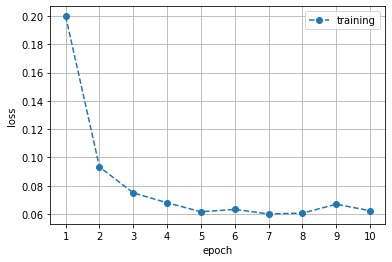

In [19]:
a=history.history['loss']
plt.plot(history.history['loss'], label="training", linestyle="dashed", marker='o')
plt.legend()
plt.ylabel("loss")
plt.xlabel("epoch")
plt.xticks(np.arange(len(a)), np.arange(1, len(a)+1))
plt.grid()
plt.show()

In [20]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 3s 10ms/step - loss: 0.0711 - accuracy: 0.9806


[0.07105645537376404, 0.9805999994277954]